In [1]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import time
import re
import pandas as pd
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

In [9]:
import os
folder_path=r"C:\Users\user\boyu571_github\01_Kakaobank_SKKU_Research_23\foreign_news_data"

file_list=os.listdir(folder_path)

In [3]:
df1 = pd.read_csv(r'C:\Users\user\boyu571_github\01_Kakaobank_SKKU_Research_23\eng_news_nocontent.csv')
df1

,source,author,title,description,url,urlToImage,publishedAt,content,press
0,"{'id': None, 'name': 'Trendmicro.com'}",Trend Micro,REDBALDKNIGHT/BRONZE BUTLER’s Daserf Backdoor ...,"REDBALDKNIGHT, also known as BRONZE BUTLER and...",https://blog.trendmicro.com/trendlabs-security...,https://blog.trendmicro.com/trendlabs-security...,2017-11-07T12:34:44Z,by Joey Chen and MingYen Hsieh (Threat Analyst...,Trendmicro.com
1,"{'id': None, 'name': 'Computerworld'}","Lucas Mearian, Lucas Mearian",What is blockchain? The most disruptive tech i...,Blockchain is poised to change IT in much the ...,https://www.computerworld.com/article/3191077/...,https://images.techhive.com/images/article/201...,2017-11-08T01:06:00Z,Blockchain is poised to change IT in much the ...,Computerworld
2,"{'id': None, 'name': 'hackernoon.com'}",Yaoqi Jia,Demystifying Hashgraph: Benefits and Challenges,"Recently, on our Zilliqa social channels a num...",https://hackernoon.com/demystifying-hashgraph-...,NaN,2017-11-08T17:21:35Z,"Recently, on our Zilliqa social channels a num...",hackernoon.com
3,"{'id': None, 'name': 'Topix.com'}",NaN,BitTorrent inventor announces eco-friendly Bit...,A Bitcoin transaction wastes as much electrici...,http://www.topix.com/tech/p2p/2017/11/bittorre...,http://picproxy.topixcdn.com/pics/up-,2017-11-08T23:21:17Z,A Bitcoin transaction wastes as much electrici...,Topix.com
4,"{'id': None, 'name': 'Ml-implode.com'}",NaN,Bitcoin Fork Called Off: Prices Soar After Seg...,The price of a bitcoin went on a tear on Wedne...,http://ml-implode.com/staticnews/2017-11-09_Bi...,NaN,2017-11-09T00:00:00Z,The price of a bitcoin went on a tear on Wedne...,Ml-implode.com
...,...,...,...,...,...,...,...,...,...
744427,"{'id': None, 'name': 'Biztoc.com'}",u.today,"Negatively Correlates With Bitcoin (BTC), What...",Shiba Inu continues to focus on utility as its...,https://biztoc.com/x/8248d6342c37d743,https://c.biztoc.com/p/8248d6342c37d743/s.webp,2023-09-30T21:50:10Z,Shiba Inu continues to focus on utility as its...,Biztoc.com
744428,"{'id': None, 'name': 'Slashdot.org'}",feedfeeder,Industry leaders and policymakers weigh in on ...,Industry leaders and policymakers weigh in on ...,https://slashdot.org/firehose.pl?op=view&amp;i...,NaN,2023-09-30T21:53:20Z,Sign up for the Slashdot newsletter! OR check ...,Slashdot.org
744429,"{'id': None, 'name': 'Investing.com'}",U.Today,Shiba Inu (SHIB) Negatively Correlates With Bi...,Shiba Inu (SHIB) Negatively Correlates With Bi...,https://www.investing.com/news/cryptocurrency-...,https://i-invdn-com.investing.com/news/LYNXNPE...,2023-09-30T22:00:22Z,U.Today - Dog-themed cryptocurrency is seeing ...,Investing.com
744430,"{'id': None, 'name': 'Ambcrypto.com'}",Benjamin Njiri,Can NEAR stay above $1?,"NEAR could be ripe for a price reversal, but t...",https://ambcrypto.com/?p=347645,https://statics.ambcrypto.com/wp-content/uploa...,2023-09-30T22:30:04Z,Disclaimer: The information presented does not...,Ambcrypto.com


In [10]:
len(file_list)

145

In [11]:
import pandas as pd
df2=pd.read_csv(folder_path+'/'+file_list[0])

In [12]:
for i, c in enumerate(file_list[1:]):
    if c.endswith('.csv'):
        print(i,c)
        df2 = pd.concat([df2, pd.read_csv(os.path.join(folder_path, c))])


0 Activistpost_15.csv
1 AlJazeeraEnglish_142.csv
2 AllAfrica_123.csv
3 Ambcrypto_18.csv
4 ArsTechnica_175.csv
5 AssociatedPress_109.csv
6 AustralianFinancialReview_161.csv
7 BangkokPost_84.csv
8 BankInfoSecurity_143.csv
9 Barrons_50.csv
10 BBCNews_95.csv
11 Bitcoinist_7.csv
12 Bitrebels_126.csv
13 BleepingComputer_59.csv
14 Blockworks_92.csv
15 BoingBoing_137.csv
16 BreitbartNews_160.csv
17 BusinessInsider_10.csv
18 BusinessLine_133.csv
19 BusinessToday_98.csv
20 CBCNews_157.csv
21 CBSNews_121.csv
22 CNA_26.csv
23 CNBC_19.csv
24 CNET_54.csv
25 CNN_106.csv
26 coindesk_5.csv
27 Coinjournal_39.csv
28 cointelegraph_3.csv
29 ComputerWeekly_177.csv
30 Cryptocynews_155.csv
31 CryptoDaily_24.csv
32 CryptoGlobe_45.csv
33 CryptoSlate_27.csv
34 DailyBeast_171.csv
35 DailyFX_49.csv
36 Dcforecasts_56.csv
37 Decrypt_29.csv
38 DigitalTrends_141.csv
39 Engadget_114.csv
40 Entrepreneur_83.csv
41 Euronews_200.csv
42 FinancialPost_176.csv
43 Finbold_38.csv
44 Finextra_43.csv
45 Forbes_9.csv
46 Forkast_52

In [13]:
df2

,Unnamed: 0,source,author,title,description,url,urlToImage,publishedAt,content,press,content_full
0,90,"{'id': 'abc-news-au', 'name': 'ABC News (AU)'}",NaN,Why you received so many gambling texts on Mel...,Did you get a rogue spammy text from a betting...,http://www.abc.net.au/triplej/programs/hack/wh...,http://www.abc.net.au/cm/rimage/9138232-1x1-la...,2017-11-10T02:54:30Z,Received a rogue spammy text from a betting co...,ABC News (AU),Received a rogue spammy text from a betting co...
1,740,"{'id': 'abc-news-au', 'name': 'ABC News (AU)'}",NaN,Big movements in value of Bitcoin,The local share market was dragged down by two...,http://www.abc.net.au/news/2017-11-13/big-move...,http://www.abc.net.au/news/image/9146426-1x1-7...,2017-11-13T08:41:19Z,"Posted November 13, 2017 19:41:19 The local sh...",ABC News (AU),The local share market was dragged down by two...
2,982,"{'id': 'abc-news-au', 'name': 'ABC News (AU)'}",NaN,What's behind the jumps and bumps in Bitcoin's...,"The price of Bitcoin has dropped to around $8,...",http://www.abc.net.au/news/2017-11-14/bitcoin-...,http://www.abc.net.au/news/image/8944484-1x1-7...,2017-11-13T19:33:13Z,"Posted November 14, 2017 06:33:13 The price of...",ABC News (AU),"The price of Bitcoin has dropped to around $8,..."
3,1729,"{'id': 'abc-news-au', 'name': 'ABC News (AU)'}",Amy McCosker,How blockchain could solve the issue of food f...,Blockchains and cryptocurrencies are no longer...,http://www.abc.net.au/news/rural/2017-11-16/ag...,http://www.abc.net.au/cm/rimage/8529260-16x9-l...,2017-11-15T19:28:47Z,Blockchains and cryptocurrencies are no longer...,ABC News (AU),Blockchains and cryptocurrencies are no longer...
4,1778,"{'id': 'abc-news-au', 'name': 'ABC News (AU)'}",NaN,Large bitcoin reward for missing world-record ...,"Two world-record winning cats are missing, and...",http://www.abc.net.au/news/2017-11-16/record-w...,http://www.abc.net.au/news/image/9155978-1x1-7...,2017-11-15T22:53:26Z,"Posted November 16, 2017 09:53:26 Two world-re...",ABC News (AU),"Two world-record winning cats are missing, and..."
...,...,...,...,...,...,...,...,...,...,...,...
3273,743605,"{'id': None, 'name': 'ZyCrypto'}",Brenda Ngari,Crypto Exchange Kraken Enters TradFi; To Offer...,Cryptocurrency exchange Kraken intends to expa...,https://zycrypto.com/crypto-exchange-kraken-en...,https://zycrypto.com/wp-content/uploads/2023/0...,2023-09-28T19:31:40Z,Cryptocurrency exchange Kraken intends to expa...,ZyCrypto,\n\n\nAdvertisement\n\n\n\n\n \r\n\r\n \nCrypt...
3274,743610,"{'id': None, 'name': 'ZyCrypto'}",Newton Gitonga,"BTC Price Pushes Above $27,000 As Bitcoin Whal...","After starting the week on a positive note, Bi...",https://zycrypto.com/btc-price-pushes-above-27...,https://zycrypto.com/wp-content/uploads/2023/0...,2023-09-28T19:55:09Z,"After starting the week on a positive note, Bi...",ZyCrypto,\n\n\nAdvertisement\n\n\n\n\n \r\n\r\n \nAfter...
3275,744199,"{'id': None, 'name': 'ZyCrypto'}",Brenda Ngari,SEC Delays Decision On Four Spot Bitcoin ETF P...,The U.S. Securities and Exchange Commission pu...,https://zycrypto.com/sec-delays-decision-on-fo...,https://zycrypto.com/wp-content/uploads/2021/1...,2023-09-29T21:00:14Z,The U.S. Securities and Exchange Commission pu...,ZyCrypto,\n\n\nAdvertisement\n\n\n\n\n \r\n\r\n \nThe U...
3276,744422,"{'id': None, 'name': 'ZyCrypto'}",Newton Gitonga,CFTC Charges Three Defi Projects for Illegal O...,The Commodity Futures Trading Commission (CFTC...,https://zycrypto.com/cftc-charges-three-defi-p...,https://zycrypto.com/wp-content/uploads/2021/1...,2023-09-30T21:08:56Z,The Commodity Futures Trading Commission (CFTC...,ZyCrypto,\n\n\nAdvertisement\n\n\n\n\n \r\n\r\n \nThe C...


In [14]:
press_df = df1['press'].value_counts()
# Convert the Series to DataFrame
press_df = press_df.reset_index()
press_df.columns = ['press', 'counts']
press_df

,press,counts
0,Biztoc.com,59724
1,Yahoo Entertainment,52606
2,Cointelegraph,30391
3,newsBTC,23601
4,CoinDesk,21189
...,...,...
10065,Chamberbusinessnews.com,1
10066,Vrmintel.com,1
10067,Arcentry.com,1
10068,Msdynamicsworld.com,1


In [15]:
press_df['counts'].sum()

744432

In [16]:
# Calculate the number of non-null content_full rows for each press
content_counts = df2[df2['content_full'].notnull()]['press'].value_counts()
content_counts = content_counts.reset_index()
content_counts.columns = ['press', 'content_counts']
content_counts

,press,content_counts
0,Yahoo Entertainment,39500
1,Cointelegraph,29651
2,newsBTC,20355
3,CoinDesk,19934
4,Seeking Alpha,18114
...,...,...
139,Forbes,294
140,The Japan Times,228
141,Tech Xplore,160
142,AllAfrica - Top Africa News,134


In [17]:
merged_df = press_df.merge(content_counts, on='press', how='left').fillna(0)
merged_df['content_counts'] = merged_df['content_counts'].astype(int)
merged_df

,press,counts,content_counts
0,Biztoc.com,59724,0
1,Yahoo Entertainment,52606,39500
2,Cointelegraph,30391,29651
3,newsBTC,23601,20355
4,CoinDesk,21189,19934
...,...,...,...
10065,Chamberbusinessnews.com,1,0
10066,Vrmintel.com,1,0
10067,Arcentry.com,1,0
10068,Msdynamicsworld.com,1,0


In [21]:
merged_df.iloc[20:40]

,press,counts,content_counts
20,Bitcoin Magazine,5886,0
21,MarketWatch,5732,5654
22,Youbrandinc.com,5609,0
23,Crypto Daily,4743,4700
24,Sys-con.com,4543,0
25,CNA,4537,4540
26,CryptoSlate,4478,4433
27,The Daily Hodl,4402,4394
28,Decrypt,4374,4342
29,Investing.com,4317,4283


In [18]:
merged_df.iloc[150]

press             Tech Xplore
counts                    669
content_counts              0
Name: 150, dtype: object

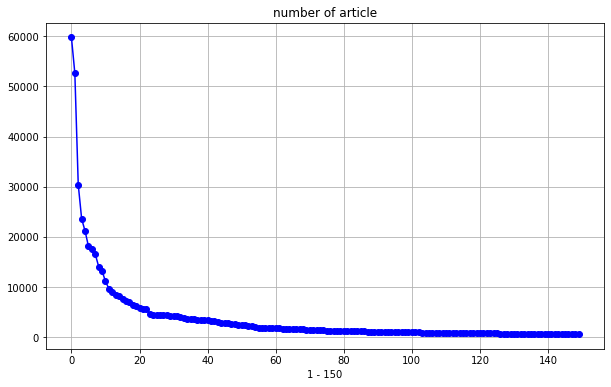

In [34]:
# 'count' 열의 데이터를 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(merged_df['counts'].head(150), marker='o', linestyle='-', color='b')  # 선 그래프 그리기
plt.title('number of article')  # 그래프 제목 설정
plt.xlabel('1 - 150')  # x축 레이블 설정
# plt.ylabel('Number of article')  # y축 레이블 설정
plt.grid(True)  # 그리드 표시
plt.show()  # 그래프 표시

In [29]:
asd = merged_df['counts'].iloc[100:200]

In [24]:
merged_df['counts'].sum()

744432

In [42]:
merged_df['counts'].head(100).sum()

538415

In [37]:
merged_df['counts'].head(117).sum()

553738

In [38]:
merged_df['content_counts'].head(100).sum()

313909

In [18]:
merged_df['content_counts'].sum()

384216

In [22]:
merged_df.to_csv('수집현황.csv', encoding='utf-8-sig')